In [3]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
pd.pandas.set_option('display.max_columns',None)

In [4]:
#read the data
data=pd.read_csv('yds_data.csv')
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [5]:
data.shape

(30697, 28)

In [6]:
data.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30697 non-null  int64  
 1   match_event_id         29134 non-null  float64
 2   location_x             29236 non-null  float64
 3   location_y             29157 non-null  float64
 4   remaining_min          29135 non-null  float64
 5   power_of_shot          29211 non-null  float64
 6   knockout_match         29180 non-null  float64
 7   game_season            24835 non-null  object 
 8   remaining_sec          29103 non-null  float64
 9   distance_of_shot       29130 non-null  float64
 10  is_goal                24429 non-null  float64
 11  area_of_shot           29195 non-null  object 
 12  shot_basics            29122 non-null  object 
 13  range_of_shot          29133 non-null  object 
 14  team_name              29162 non-null  object 
 15  da

In [8]:
data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [9]:
data.corr().T

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
Unnamed: 0,1.000000,0.031239,-0.020904,0.031881,-0.004952,0.002229,0.611755,-0.004785,0.015183,-0.012693,1.000000,0.761656,NaN,0.007058,0.000610,0.005797,0.003001,0.003279
match_event_id,0.031239,1.000000,-0.030212,0.059463,-0.272789,0.956095,-0.001414,-0.022830,0.061072,-0.038705,0.029223,0.000789,NaN,-0.043133,0.022375,-0.001657,-0.003767,0.026465
location_x,-0.020904,-0.030212,1.000000,-0.014907,0.007889,-0.028939,-0.012840,0.001631,0.023483,-0.004728,-0.020701,-0.020021,NaN,0.002110,-0.000150,0.005408,0.006466,0.004695
location_y,0.031881,0.059463,-0.014907,1.000000,-0.074579,0.041263,0.001962,-0.050964,0.818727,-0.145413,0.032438,-0.013659,NaN,-0.010678,-0.000933,0.009672,-0.022644,0.323209
remaining_min,-0.004952,-0.272789,0.007889,-0.074579,1.000000,-0.043992,0.014806,0.026664,-0.058495,0.028342,-0.003587,0.014595,NaN,0.098414,-0.004447,-0.010549,0.016655,-0.022925
power_of_shot,0.002229,0.956095,-0.028939,0.041263,-0.043992,1.000000,0.010686,0.003066,0.046184,-0.034698,0.001088,0.011857,NaN,-0.018268,0.026339,-0.003296,0.007004,0.023045
knockout_match,0.611755,-0.001414,-0.012840,0.001962,0.014806,0.010686,1.000000,-0.000886,-0.009546,0.001152,0.612181,0.917184,NaN,0.005961,0.001193,0.009470,-0.003515,0.000299
remaining_sec,-0.004785,-0.022830,0.001631,-0.050964,0.026664,0.003066,-0.000886,1.000000,-0.049875,0.028964,-0.005976,-0.004893,NaN,0.006628,0.002475,0.002258,0.464134,-0.018455
distance_of_shot,0.015183,0.061072,0.023483,0.818727,-0.058495,0.046184,-0.009546,-0.049875,1.000000,-0.198234,0.016110,-0.031433,NaN,-0.006094,0.000784,0.006642,-0.025477,0.398123
is_goal,-0.012693,-0.038705,-0.004728,-0.145413,0.028342,-0.034698,0.001152,0.028964,-0.198234,1.000000,-0.010696,-0.000169,NaN,0.008384,-0.001363,-0.001224,0.012209,-0.075195


In [10]:
#Drop unnesscary columns
data=data.drop(columns=['Unnamed: 0', 'match_event_id',
        'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],axis=1)

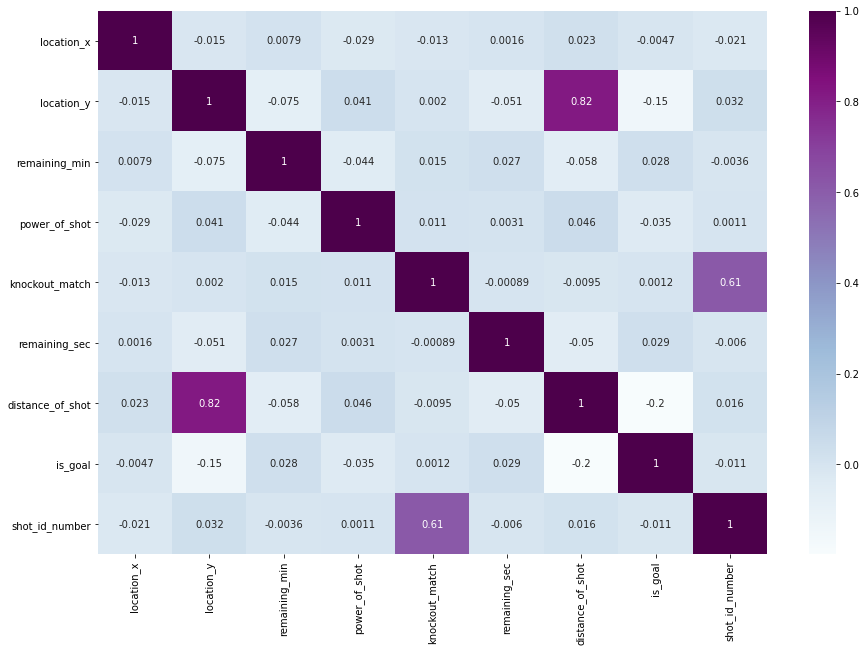

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')

In [12]:
class Dataframe_info:
    def __init__(self):
        print('Attribute information object is created')
        
    def Attribute_information(self,data):
        data_info=pd.DataFrame(columns=['No of Observations',
                                       'No of variables',
                                       'No of Numerical variables',
                                        'No of Factor variables',
                                       'No of Categorical variables',
                                       'No of Logical variables',
                                       'No of Date variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of Observations']=data.shape[0]
        data_info.loc[0,'No of variables']=data.shape[1]
        data_info.loc[0,'No of Numerical variables']=data._get_numeric_data().shape[1]
        data_info.loc[0,'No of Factor variables']=data.select_dtypes(include='category').shape[1]
        data_info.loc[0,'No of Categorical variables']=data.select_dtypes(include='object').shape[1]
        data_info.loc[0,'No of Logical variables']=data.select_dtypes(include='bool').shape[1]
        data_info.loc[0,'No of Date variables']=data.select_dtypes(include='datetime64').shape[1]
        data_info.loc[0,'No of zero variance variables']=data.loc[:,data.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        data_info.columns=['value']
        
        return data_info
    
    def get_missing_data(self,df):
        
        #check how many missing value are present in the data
        missing_values=data.isnull().sum()
        #sort the missing value from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        
        return missing_values
    
    def agg_tabulation(self,data):
        """This method gives the additional information about the data like entrophy values,percentage of missing values
        """
        
        print("-"*30)
        print('Agg Tabulation')
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of Missing values']=data.isnull().sum().values
        table['No of unique values']=data.nunique().values
        table['Percentage of Missing data']=((data.isnull().sum().values/data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second Observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
        return table
    
    def iqr(self,x):
        """ This method gives the inter quartile range of the each variable
        """
        return x.quantile(q=0.75)-x.quantile(q=0.25)
    
    def otlier_s(self,x):
        """This is a private method which gives the how much outliers that are present in the variable 
        """
        upper_out=x.quantile(q=0.75)+1.5*self.iqr(x)
        lower_out=x.quantile(q=0.25)-1.5*self.iqr(x)
        
        return len(x[x > upper_out])+len(x[x < lower_out])

In [13]:
df_data=Dataframe_info()

Attribute information object is created


In [14]:
df_data.Attribute_information(data)

,value
No of Observations,30697
No of variables,19
No of Numerical variables,9
No of Factor variables,0
No of Categorical variables,10
No of Logical variables,0
No of Date variables,0
No of zero variance variables,1


In [15]:
df_data.agg_tabulation(data)

------------------------------
Agg Tabulation


,Name,dtypes,No of Missing values,No of unique values,Percentage of Missing data,First Observation,Second Observation,Third Observation
0,location_x,float64,1461,488,4.759423,167,-157,-101
1,location_y,float64,1540,450,5.016777,72,0,135
2,remaining_min,float64,1562,12,5.088445,10,10,7
3,power_of_shot,float64,1486,7,4.840864,1,1,1
4,knockout_match,float64,1517,2,4.941851,0,0,0
5,game_season,object,5862,20,19.096329,2000-01,2000-01,2000-01
6,remaining_sec,float64,1594,60,5.192690,27,22,45
7,distance_of_shot,float64,1567,73,5.104733,38,35,36
8,is_goal,float64,6268,2,20.418933,NaN,0,1
9,area_of_shot,object,1502,6,4.892986,Right Side(R),Left Side(L),Left Side Center(LC)


In [16]:
df_data.iqr(data)

location_x            163.0
location_y            156.0
remaining_min           6.0
power_of_shot           2.0
knockout_match          0.0
remaining_sec          30.0
distance_of_shot       16.0
is_goal                 1.0
shot_id_number      15362.5
dtype: float64

In [17]:
df_data.otlier_s(data)

61394

In [18]:
unique_game_values=data['game_season'].unique()
unique_game_values

array(['2000-01', nan, '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '1996-97',
       '1997-98', '1998-99', '1999-00'], dtype=object)

In [19]:
l_v=np.arange(len(unique_game_values))
l_v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [20]:
data['game_season'].replace(to_replace=unique_game_values,value=l_v,inplace=True)

In [21]:
data['date_of_game']=pd.to_datetime(data['date_of_game'],errors='coerce')

In [22]:
data['date_of_game']

0       2000-10-31
1       2000-10-31
2       2000-10-31
3       2000-10-31
4       2000-10-31
           ...    
30692   2000-06-19
30693   2000-06-19
30694   2000-06-19
30695   2000-06-19
30696   2000-06-19
Name: date_of_game, Length: 30697, dtype: datetime64[ns]

In [23]:
def plot_bar(data,variable):
    plt.figure(figsize=(13,6))
    g=data[variable].value_counts().plot.bar()    
    g.set_title(variable)
    g.set_xticklabels(g.get_xticklabels())
    plt.show()
    return g

In [24]:
d_t=data[['remaining_min', 'power_of_shot',
       'knockout_match', 'game_season',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name', 'lat/lng',
       'type_of_shot', 'type_of_combined_shot']]

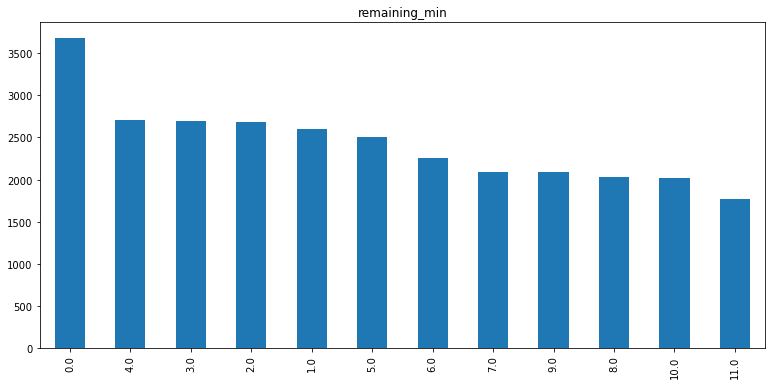

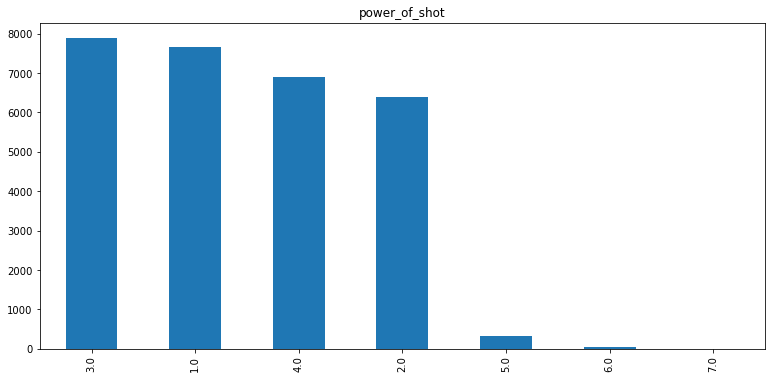

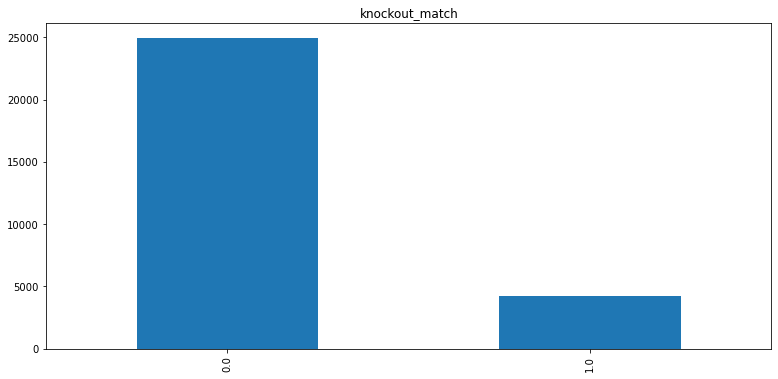

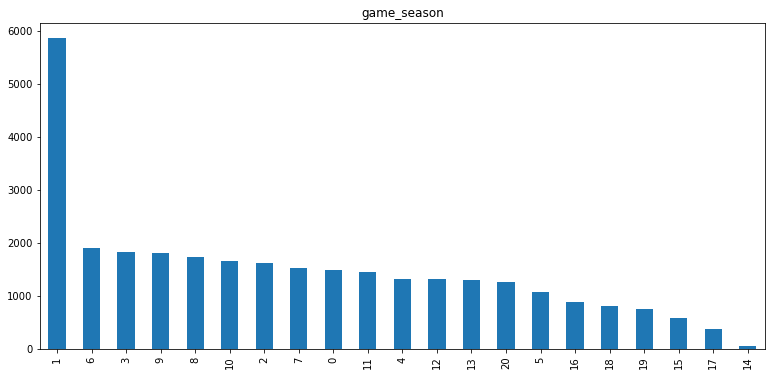

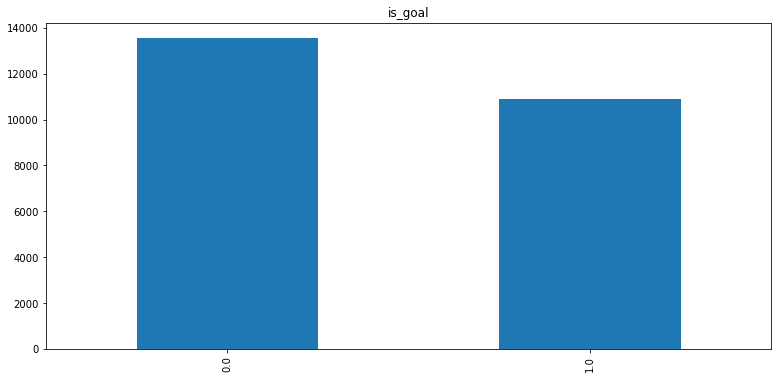

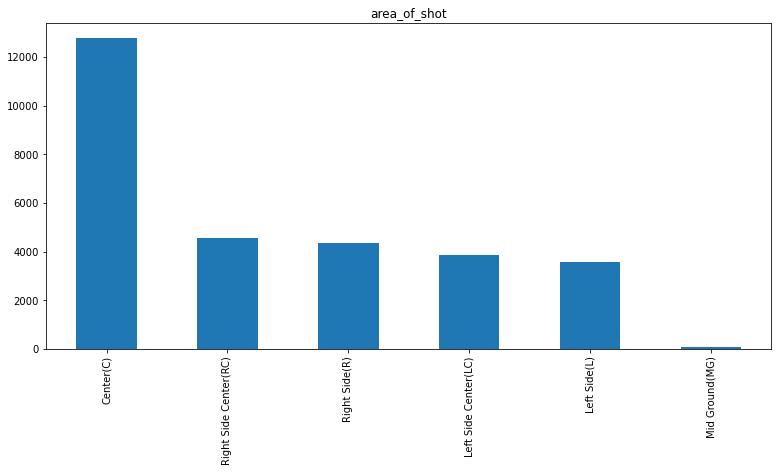

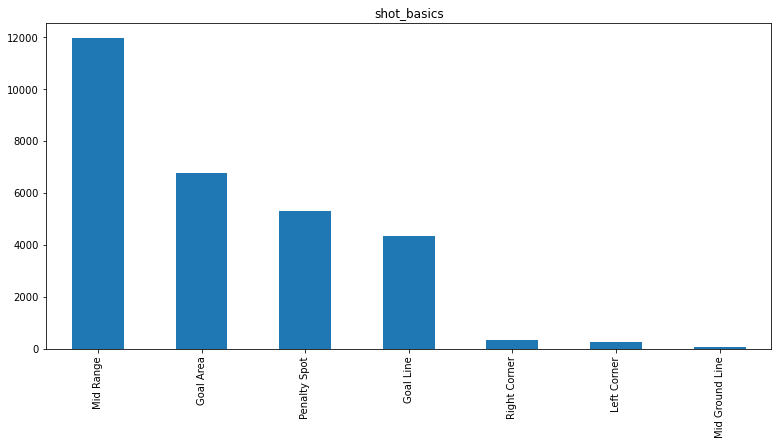

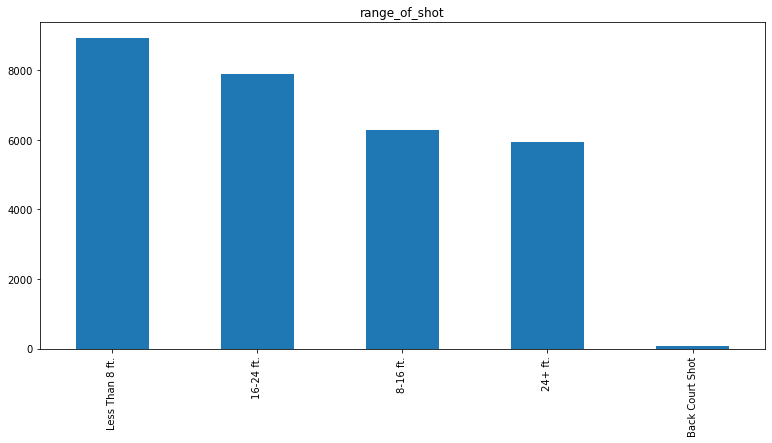

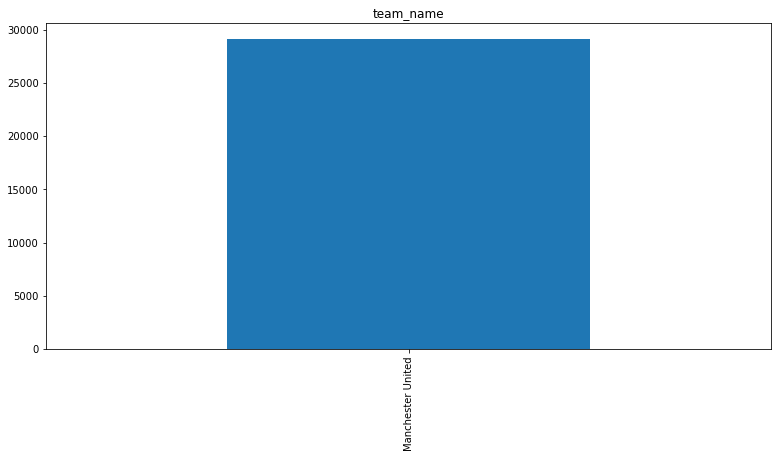

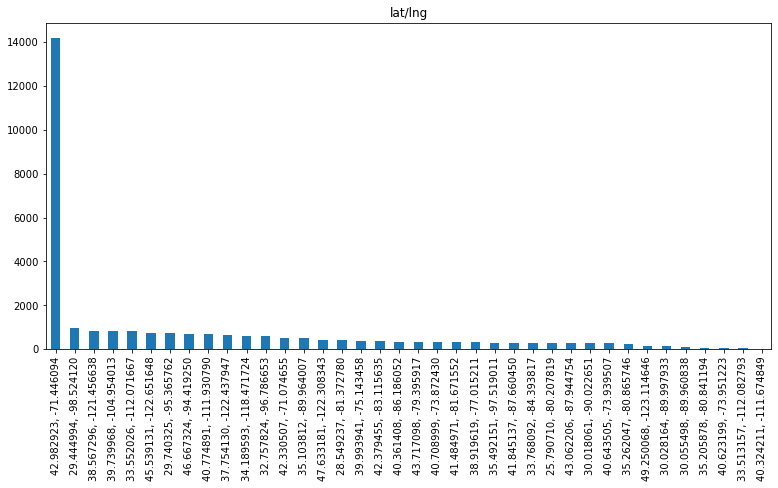

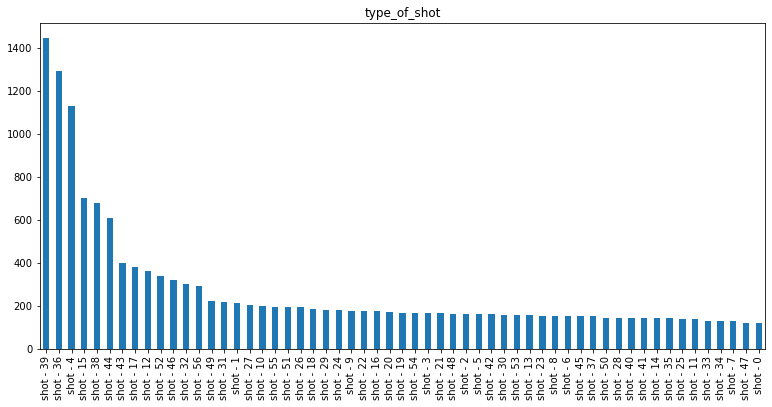

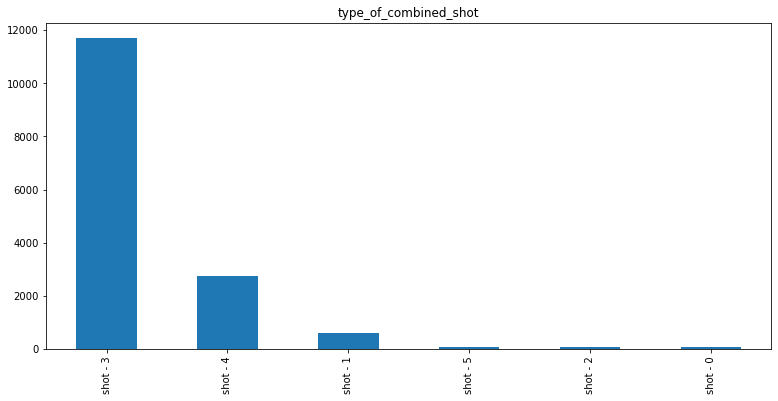

In [25]:
for j in d_t:
    plot_bar(data,j)

In [26]:
missing_data=pd.DataFrame({'Missing_vaues':data.isnull().sum(),'Percentage':(data.isnull().sum()/data.shape[0])*100})
missing_data.head()

,Missing_vaues,Percentage
location_x,1461,4.759423
location_y,1540,5.016777
remaining_min,1562,5.088445
power_of_shot,1486,4.840864
knockout_match,1517,4.941851


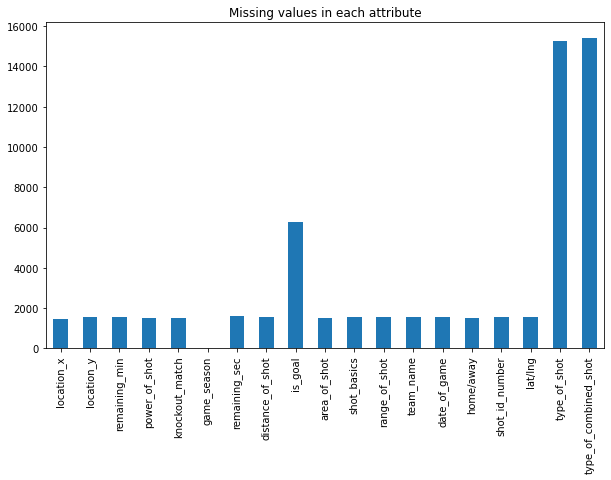

In [27]:
plt.figure(figsize=(10,6))
g=missing_data['Missing_vaues'].plot.bar()
g.set_title('Missing values in each attribute')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

In [28]:
#Check the data is balanced or not
print('Not Goal: {}'.format(len(data[data['is_goal']==0])))
print('Goal : {}'.format(len(data[data['is_goal']==1])))

Not Goal: 13550
Goal : 10879


In [29]:
def variable_info(data,variable):
    print('*'*35)
    print(variable+"--------->\n")
    print('Mean:{}'.format(data[variable].mean()))
    print('Median:{}'.format(data[variable].median()))
    print('Mode:{}'.format(data[variable].mode()[0]))

In [30]:
num_data=[x for x in data.columns if data[x].dtype !='O' and x not in ['date_of_game']]

In [31]:
for i in num_data:
    
    variable_info(data,i)

***********************************
location_x--------->

Mean:7.383876043234369
Median:0.0
Mode:0.0
***********************************
location_y--------->

Mean:91.12693349795933
Median:74.0
Mode:0.0
***********************************
remaining_min--------->

Mean:4.883233224643899
Median:5.0
Mode:0.0
***********************************
power_of_shot--------->

Mean:2.51935914552737
Median:3.0
Mode:3.0
***********************************
knockout_match--------->

Mean:0.14595613433858806
Median:0.0
Mode:0.0
***********************************
game_season--------->

Mean:7.418347069746229
Median:7.0
Mode:1
***********************************
remaining_sec--------->

Mean:28.329381850668316
Median:28.0
Mode:0.0
***********************************
distance_of_shot--------->

Mean:33.448884311706145
Median:35.0
Mode:20.0
***********************************
is_goal--------->

Mean:0.4453313684555242
Median:0.0
Mode:0.0
***********************************
shot_id_number--------->

Mean:1

In [32]:
data.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot
0,167.0,72.0,10.0,1.0,0.0,0,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN
1,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN
2,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN
3,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3
4,0.0,0.0,NaN,2.0,0.0,0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1


In [33]:
#Fill the nan values in 'remaining_sec' by mean
data['remaining_sec']=data['remaining_sec'].fillna(data['remaining_sec'].mean())

In [34]:
#Replace the nan values in 'type_of_combined_shot' by mode
data['type_of_combined_shot']=data['type_of_combined_shot'].replace(np.NaN,data['type_of_combined_shot'].mode()[0])

In [35]:
#fill the nan values in 'remaining_min' by median
data['remaining_min']=data['remaining_min'].fillna(data['remaining_min'].median())

In [36]:
data['shot_id_number']=pd.Series(np.arange(1,data['shot_id_number'].shape[0]+1))

In [37]:
#Fill the nan in 'location_x' and 'location_y' with zero
data['location_x'].fillna(value=0,inplace=True)
data['location_y'].fillna(value=0,inplace=True)

In [38]:
data.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot
0,167.0,72.0,10.0,1.0,0.0,0,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1,"45.539131, -122.651648",shot - 30,shot - 3
1,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2,"45.539131, -122.651648",shot - 45,shot - 3
2,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3,"45.539131, -122.651648",shot - 25,shot - 3
3,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4,"45.539131, -122.651648",NaN,shot - 3
4,0.0,0.0,5.0,2.0,0.0,0,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5,"45.539131, -122.651648",NaN,shot - 1


In [39]:
print('Nan values before handling in home/away: {}'.format(data['home/away'].isnull().sum()))
col = ['home/away','lat/lng', 'team_name','knockout_match']
data.loc[:,col]=data.loc[:,col].ffill()
print('Nan values after handling in home/away: {}'.format(data['home/away'].isnull().sum()))

Nan values before handling in home/away: 1497
Nan values after handling in home/away: 0


In [41]:
#Filling missing values in 'shot_basics' based on 'range_of_shots'
data.loc[(data.range_of_shot == '16-24 ft.'),'shot_basics']=data[data.range_of_shot == '16-24 ft.'].shot_basics.fillna('Mid Range')
#if 'range_of_shots' is less than 8ft
#data.loc[(data.range_of_shot == 'Less Than 8 ft.')&(data.shot_basics.isnull()),'shot_basics']=pd.Series(data[(data.range_of_shot == 'Less Than 8 ft.')&(data.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choise(['Goal Area','Goal Line'],1,p=[0.7590347263095939, 0.24096527369040613])[0]))
#if range_of_shots is 8-16ft
#data.loc[(data.range_of_shot == '8-16 ft.')&(data.shot_basics.isnull()),'shot_basics']=pd.Series(data[(data['range_of_shot'] == '8-16 ft.')&(data.shot_basics.isnull())].short_basics.apply(lambda x: x if type(x)==str else np.random.choise(['Mid Range','Goal Line'],1,p=[0.6488754615642833, 0.35112453843571667])[0]))
#data.loc[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull()), 'shot_basics']            =  pd.Series(data[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Penalty Spot', 'Right Corner', 'Left Corner'],1,p=[0.8932384341637011, 0.06192170818505338, 0.044839857651245554])[0]))
# if the shot is a back court shot then randomly assign one of the values from''Mid Ground Line', 'Penalty Spot' to shot_basic field
#data.loc[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull()), 'shot_basics']    =  pd.Series(data[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Ground Line', 'Penalty Spot'],1,p=[0.8441558441558441, 0.15584415584415584])[0]))
#data.isna().sum()